# Chem 30324, Spring 2018, Homework 8
Due April 1, 2019

## Molecular Orbitals.
### The electron wavefunctions(molecular orbitals) in molecules can be thought of as coming from linear combinations of atomic orbitals on the constituent atoms (in this context, the atomic orbitals are called “basis functions”). One of the factors that determines whether two atomic orbitals  form a molecular orbital is there ability to overlap. Consider two atoms, A and B, aligned on the z axis and separated by a distance $R$.

### 1. The overlap between two 1s orbitals on A and B can be shown to be: $$S = \left \{1+\frac{R}{a_0}+\frac{1}{3}\left (\frac{R}{a_0}\right )^2\right \}e^{-R/a_0}$$ Plot out the overlap as a function of the internuclear distance $R$. Qualitatively explain why it has the shape it has.

Text(0.5,1,'The Overlap Between Two 1s Orbitals')

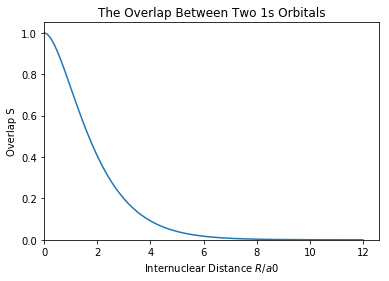

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0,12,100) # r=R/a0
P = (1+r+1/3*r**2)*np.exp(-r)

plt.plot(r,P)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Internuclear Distance $R/a0$')
plt.ylabel('Overlap S')
plt.title('The Overlap Between Two 1s Orbitals')

### 2. The overlap functions for other pairs of orbitals are more complicated, but the general features are easily inferred. Neatly sketch the orbital overlap between a 1s orbital on A and 2p$_z$ orbital on B as a function $R$. Carefully indicate the limiting values as $R \rightarrow 0$ and $R \rightarrow \infty$.

![](https://github.com/yixiaohou1/P-Chem/raw/master/2.jpg)

### 3. Choose some other pair of atomic orbitals on A and B and sketch out their overlap as a function of $R$. Carefully indicate the limiting values as  𝑅→0  and  𝑅→∞ .

![](https://github.com/yixiaohou1/P-Chem/raw/master/3.jpg)

### 4. What property besides overlap determines whether two atomic orbitals will form a molecular orbital?

The similarity of the energies of the two atomic orbitals, ie the value of $$\beta = \langle \phi_1 | \hat{f} | \phi_2 \rangle $$.

## The Hückel model and π orbitals

### One of the first successes of molecular orbital theory was application to the π systems of conjugated hydrocarbons. (See [Roberts, Notes on Molecular Orbital Theory](http://resolver.caltech.edu/CaltechBOOK:1961.001).) In the Hückel model, one constructs a π-only secular matrix and uses simple rules for the matrix elements. $S_{ii} = 1$ for a basis function with itself and $S_{ij} = 0$ otherwise. $F_{ii} = \alpha$ for a basis function with itself, $F_{ij}=\beta$ between adjacent atoms, and $F_{ij}=0$ otherwise. 

### 5. Construct and solve the secular matrix for cyclopentane, C$_5$H$_5$.  Make an energy level diagram for the π system.

In [3]:
from sympy import *

a = symbols("alpha")
b = symbols("beta")
M = Matrix([[a,b,0,0,b],[b,a,b,0,0],[0,b,a,b,0],[0,0,b,a,b],[b,0,0,b,a]])

pprint(M)

⎡α  β  0  0  β⎤
⎢             ⎥
⎢β  α  β  0  0⎥
⎢             ⎥
⎢0  β  α  β  0⎥
⎢             ⎥
⎢0  0  β  α  β⎥
⎢             ⎥
⎣β  0  0  β  α⎦


In [4]:
Mev = M.eigenvals()
pprint(Mev)
# (eigenvalue:algebraic multiplicity, eigenvalue:algebraic multiplicity, eigenvalue:algebraic multiplicity)

⎧                β   √5⋅β         √5⋅β   β   ⎫
⎨α + 2⋅β: 1, α - ─ + ────: 2, α - ──── - ─: 2⎬
⎩                2    2            2     2   ⎭


$\therefore E_1=\alpha+2\beta, E_2=\alpha+\frac{\sqrt{5}-1}{2}\beta, E_3=\alpha-\frac{\sqrt{5}+1}{2}\beta$

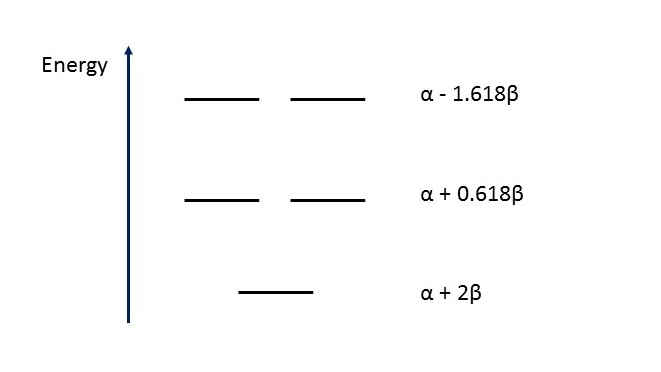

### 6. Use back-substitution to determine the coefficients for each molecular orbital.

In [21]:
Meigs  = M.eigenvects()
for state in [0,1,2]:
    print("Eigenvector(s) for state ",state,":", Meigs[state][2])

('Eigenvector(s) for state ', 0, ':', [Matrix([
[1],
[1],
[1],
[1],
[1]])])
('Eigenvector(s) for state ', 1, ':', [Matrix([
[                                        -beta**3/(-beta**2*(-sqrt(5)*beta/2 + beta/2) + (-beta**2 + (-sqrt(5)*beta/2 + beta/2)**2)*(-sqrt(5)*beta/2 + beta/2))],
[              beta**2*(-sqrt(5)*beta/2 + beta/2)/(-beta**2*(-sqrt(5)*beta/2 + beta/2) + (-beta**2 + (-sqrt(5)*beta/2 + beta/2)**2)*(-sqrt(5)*beta/2 + beta/2))],
[-beta*(-beta**2 + (-sqrt(5)*beta/2 + beta/2)**2)/(-beta**2*(-sqrt(5)*beta/2 + beta/2) + (-beta**2 + (-sqrt(5)*beta/2 + beta/2)**2)*(-sqrt(5)*beta/2 + beta/2))],
[                                                                                                                                                             1],
[                                                                                                                                                             0]]), Matrix([
[-(beta**5*(-sqrt(5)*beta/2 + beta/2) + (beta**3 + beta

Because the second and third states are degenerate, the eigenvectors can be written in more than one way.  Wolfram alpha seems to do a nicer job of reporting those eigenvectors in a clear form. Here we use Wolfram alpha is used to acquire the  eigenvectors and use python to normalize the coefficients to make $c_1^2 + c_2^2 + c_3^2 + c_4^2 + c_5^2 = 1$.
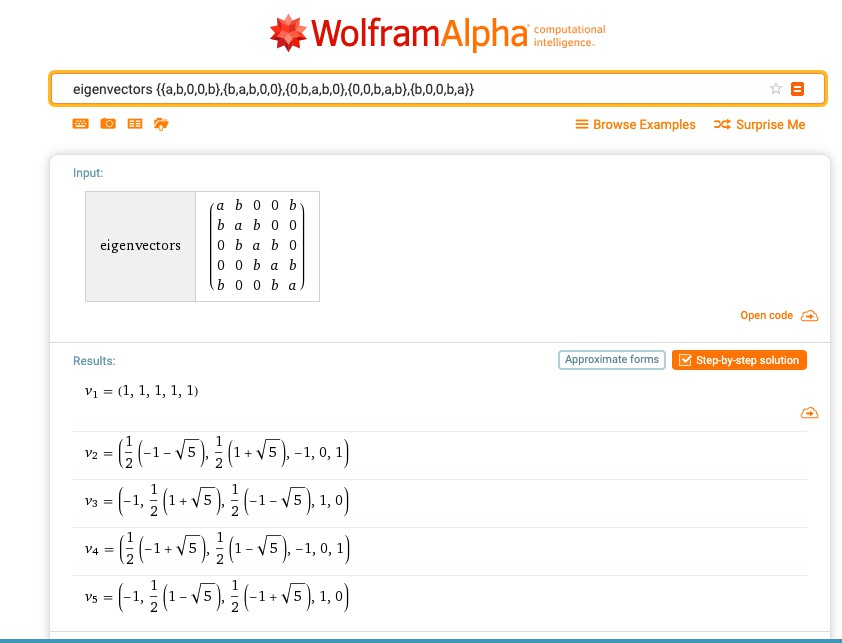

In [6]:
import numpy as np
c1 = [1,1,1,1,1]
c2 = [-np.sqrt(5)/2 - 1/2,1/2 + np.sqrt(5)/2,-1,0,1]
c3 = [-1,1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 - 1/2,1,0]
c4 = [-1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 + 1/2,-1,0,1]
c5 = [-1,-np.sqrt(5)/2 + 1/2,-1/2 + np.sqrt(5)/2,1,0]

s1 = s2 = s3 = s4 = s5 = 0 
n1,n2,n3,n4,n5 = [],[],[],[],[] # normalized eigenvectors
for i in c1:
    s1 = s1+i**2
for i in c2:
    s2 = s2+i**2
for i in c3:
    s3 = s3+i**2
for i in c4:
    s4 = s4+i**2
for i in c5:
    s5 = s5+i**2
for i in c1:
    n1.append(i/np.sqrt(s1))
for i in c2:
    n2.append(i/np.sqrt(s2))
for i in c3:
    n3.append(i/np.sqrt(s3))
for i in c4:
    n4.append(i/np.sqrt(s4))
for i in c5:
    n5.append(i/np.sqrt(s5))
print(n1,n2,n3,n4,n5)

[0.4472135954999579, 0.4472135954999579, 0.4472135954999579, 0.4472135954999579, 0.4472135954999579] [-0.6015009550075456, 0.6015009550075456, -0.37174803446018445, 0.0, 0.37174803446018445] [-0.37174803446018445, 0.6015009550075456, -0.6015009550075456, 0.37174803446018445, 0.0] [0.37174803446018456, -0.37174803446018456, -0.6015009550075457, 0.0, 0.6015009550075457] [-0.6015009550075457, -0.37174803446018456, 0.37174803446018456, 0.6015009550075457, 0.0]


$$\therefore\psi_1 = 0.4472\phi_1 + 0.4472\phi_2 + 0.4472\phi_3 + 0.4472\phi_4 +0.4472\phi_5$$
$$\psi_2 = -0.6015\phi_1 + 0.6015\phi_2 -0.3717\phi_3 + 0.3717\phi_5$$
$$\psi_3 = -0.3717\phi_1 + 0.6015\phi_2 -0.6015\phi_3 + 0.3717\phi_4$$
$$\psi_4 = 0.3717\phi_1 -0.3717\phi_2 -0.6015\phi_3 + 0.6015\phi_5$$
$$\psi_5 = -0.6015\phi_1 -0.3717\phi_2 + 0.3717\phi_3 + 0.6015\phi_4$$

### 7. Predict the spin-multiplicities of C$_5$H$_5^+$, C$_5$H$_5$, and C$_5$H$_5^-$.  In which one do you expect all the C-C distances to be the same?

Spin multiplicity = (2S+1), where S = net spin of electrons.

According to the energy level diagram for the π system, C 5 H +5  has 4  𝜋  electrons, 2 unpaired electrons, the spin-multiplicity is 3; C 5 H 5  has 5  𝜋  electrons, 1 unpaired electrons, the spin-multiplicity is 2; C 5 H −5  has 6  𝜋  electrons, 0 unpaired electrons, the spin-multiplicity is 1. C 5 H −5  follows the Hückel's rule (has 4n + 2  𝜋  electrons), so it has aromatic properties and all the C-C distances will be the same.

## Computational chemistry. 
### Today properties of a molecule are more often than not calculated rather than inferred. Quantitative molecular quantum mechanical calculations require specialized numerical solvers like Gaussian (<https://www.gaussian.com>). Following are instructions for using Gaussian with the Webmo graphical interface (<https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi>).

### Now, let’s set up your calculation (you may do this with a partner if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to sketch a molecule.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Select the “B3LYP” functional and the Routine basis set.
6. Select the right arrow to run the calculation.
7. From the job manager window choose the completed calculation to view the results.

The molecule you are to study depends on your last name. Choose according to the list:
+ A-G: **CO**
+ H-R: **BN**
+ S-Z: **BeO**

For your convenience, here are the total energies (in Hartree, 27.212 eV/Hartree) of the constituent atoms, calculated using the B3LYP DFT treatment of $v_{ee}$ and the “Routine” basis set:

|Atom|Energy|Atom|Energy|
|-|-|-|-|
|B|–24.65435|N|–54.559498|
|Be|–14.65446|O|–75.031179|
|C|–37.68086|F|–99.681600|

### 8. Construct a potential energy surface for your molecule. Using covalent radii, guess an approximate equilbrium bond length, and use the Webmo editor to draw the molecule with that length. Specify the “Molecular Energy” option to Gaussian and the “Routine” basis set for better accuracy. Calculate and plot out total molecular energy vs. bond distance in increments of 0.05 Å about your guessed minimum, including enough points to encompass the actual minimum. (You will find it convenient to subtract off the individual atom energies from the molecular total energy and to convert to more convenient units, like eV or kJ/mol.) By fitting the few points nearest the minimum, determine the equilibrium bond length. How does your result compare to literature?

### CO molecule 

Fitted result: E = 71.304187x^2 + (-164.110637)x + 78.126368
E_min_CO = -16.300903eV.


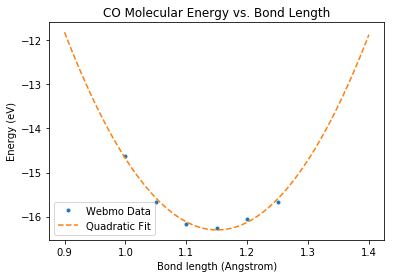

L_equilibrium = 1.150778 A > 1.128 A (in literature).


In [36]:
# Carbon Monoxide
# From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L = 1.128 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_C = -37.68086 # Ha, energy of single C atom
E_O = -75.031179 # Ha, energy of single O atom
length = [1.00, 1.05, 1.10, 1.15, 1.2, 1.25] # Angstrom
E_CO = [-113.249199,-113.287858,-113.305895,-113.309135,-113.301902,-113.287408] # Ha, energy of CO
E_bond = [] # energy of CO bond
for i in E_CO:
    E_bond.append((i-E_C-E_O)*27.212) # eV, Energy[CO - C - O] = Energy[bond]
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(0.9, 1.4, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_CO = min(z) # Find the minimum in energy array
print('E_min_CO = %feV.'%(E_min_CO)) 

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('CO Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A > 1.128 A (in literature).'%(l[0])) # equilibrium bond length

### BN molecule 

Fitted result: E = 36.038407x^2 + (-92.533003)x + 54.763762
E_min_BN = -4.633537eV.


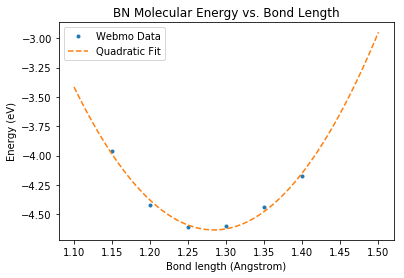

L_equilibrium = 1.283811 A < 1.325 A (in literature).


In [5]:
#Boron Nitride 
#From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L= 1.325 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_B = -24.65435 # Ha, energy of single B atom
E_N = -54.559498 # Ha, energy of single N atom
length = [1.15, 1.2, 1.25, 1.3, 1.35, 1.4] # Angstrom
E_BN = [-79.359357,-79.376368,-79.383355,-79.382896,-79.377003,-79.367236] # Ha, energy of BN
E_bond = [] # energy of BN bond
for i in E_BN:
    E_bond.append((i-E_B-E_N)*27.212)
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(1.1, 1.5, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_BN = min(z) # Find the minimum in energy array
print('E_min_BN = %feV.'%(E_min_BN)) 

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BN Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A < 1.325 A (in literature).'%(l[0])) # equilibrium bond length

### BeO molecule 

Fitted result: E = 26.920637x^2 + (-72.138820)x + 42.476375
E_min_BeO = -5.850784eV.


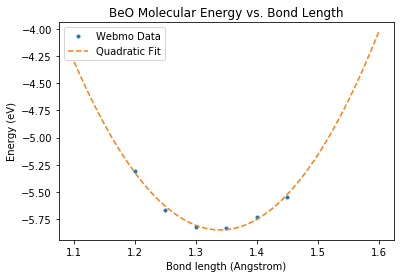

L_equilibrium = 1.339842 A > 1.331 A (in literature).


In [18]:
#Berrylium Oxide
#From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L = 1.331 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_Be = -14.65446 # Ha
E_O = -75.031179 # Ha
length = [1.2, 1.25, 1.3, 1.35, 1.4, 1.45] # Angstrom
E_BeO = [-89.880569,-89.893740,-89.899599,-89.899934,-89.896149,-89.889335] # Ha, energy of BeO
E_bond = [] # energy of BeO bond
for i in E_BeO:
    E_bond.append((i-E_Be-E_O)*27.212)
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(1.1, 1.6, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_BeO = min(z) # Find the minimum in energy array
print('E_min_BeO = %feV.'%(E_min_BeO)) 

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BeO Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A > 1.331 A (in literature).'%(l[0])) # equilibrium bond length

### 9. Use the quadratic fit from Question 8 to determine the harmonic vibrational frequency of your molecule, in cm$^{-1}$. Recall that the force constant is the second derivative of the energy at the minimum, and that the frequency (in wavenumbers) is related to the force constant according to $$\tilde{\nu} = \frac{1}{2\pi c}\sqrt{\frac{k}{\mu}}$$

$$k=\frac{d^2}{dx^2}(C_1x^2+C_2x+C_3)=2C_1 \quad where \quad C_1 = 71.3042(CO),\quad 36.0384(BN),\quad 26.9206(BeO).$$

### CO molecule

In [19]:
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_CO = 2*71.30418671*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_C = 12.0107*1.6605e-27 # kg
m_O = 15.9994*1.6605e-27 # kg
mu_CO = m_C*m_O/(m_C+m_O) # kg, reduced mass

nu_CO = 1/(2*np.pi*c)*np.sqrt(k_CO/mu_CO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_CO)) 

The harmonic vibrational frequency is 2377.567475 cm^-1.


### BN molecule

In [20]:
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_BN = 2*36.0384*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_B = 10.811*1.6605e-27 # kg
m_N = 14.0067*1.6605e-27 # kg
mu_BN = m_B*m_N/(m_B+m_N) # kg, reduced mass

nu_BN = 1/(2*np.pi*c)*np.sqrt(k_BN/mu_BN)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_BN))

The harmonic vibrational frequency is 1792.324670 cm^-1.


### BeO molecule

In [21]:
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_BeO = 2*26.920637*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_Be = 9.01218*1.6605e-27 # kg
m_O = 15.9994*1.6605e-27 # kg
mu_BeO = m_Be*m_O/(m_Be+m_O) # kg, reduced mass

nu_BeO = 1/(2*np.pi*c)*np.sqrt(k_BeO/mu_BeO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_BeO))

The harmonic vibrational frequency is 1593.677593 cm^-1.


### 10. Use your results to determine the zero-point-corrected bond energy of your molecule. How does this model compare with the experimental value?

In [57]:
# Get experimental vibrational zero-point energy from NIST database: https://cccbdb.nist.gov/exp1x.asp
nu_CO_exp = 1084.9 # cm^-1
nu_BN_exp = 760.2 # cm^-1
nu_BeO_exp = 728.5 # cm^-1

### CO molecule

In [58]:
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34 
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_CO = (-16.300903*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_CO = (0.5*h*nu_CO*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_CO = E_min_CO + E0_CO # kJ/mol, ZPC bond energy
# Experiments
E0_CO_exp = (0.5*h*nu_CO_exp*100*c)*NA/1000 
EB_CO_exp = E_min_CO + E0_CO_exp 
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_CO,-EB_CO_exp))

|E_ZPC| = 1558.599791 kJ/mol < 1566.331647 kJ/mol.


### BN molecule

In [59]:
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34 
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_BN = (-4.633537*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_BN = (0.5*h*nu_BN*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_BN = E_min_BN + E0_BN # kJ/mol, ZPC bond energy
# Experiments
E0_BN_exp = (0.5*h*nu_BN_exp*100*c)*NA/1000 
EB_BN_exp = E_min_BN + E0_BN_exp 
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_BN,-EB_BN_exp))

|E_ZPC| = 436.354356 kJ/mol < 442.527822 kJ/mol.


### BeO molecule

In [60]:
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34 
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_BeO = (-5.850784*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_BeO = (0.5*h*nu_BeO*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_BeO = E_min_BeO + E0_BeO # kJ/mol, ZPC bond energy
# Experiments
E0_BeO_exp = (0.5*h*nu_BeO_exp*100*c)*NA/1000 
EB_BeO_exp = E_min_BeO + E0_BeO_exp 
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_BeO,-EB_BeO_exp))

|E_ZPC| = 554.990706 kJ/mol < 560.165609 kJ/mol.


## Computational chemistry, part deux

### Diatomics are a little mundane.  These same methods can be used to compute the properties of much more complicated things.  As example, the OQMD database <http://oqmd.org/> contains results for many solids. We don't have time to get this complicated in class, but at least you can compute properties of some molecules.

### 11. Working with some of your classmates, compute the equilibrium structures of C$_2$H$_6$, C$_2$H$_4$, and C$_2$H$_2$.  Compare their equilibrium C-C bond lengths.  Do they vary in the way you expect?

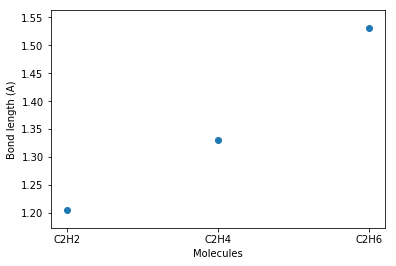

In [74]:
C2H6 = 1.531 # Angstrom
C2H4 = 1.331 # Angstrom
C2H2 = 1.205 # Angstrom

import matplotlib.pyplot as plt
plt.scatter([0,1,2],[C2H2,C2H4,C2H6])
plt.xlabel('Molecules')
plt.ylabel('Bond length (A)')
plt.xticks(np.arange(3), ('C2H2','C2H4','C2H6'))
plt.show()

C-C bond order decreases and C-C distance increases from acetylene to ethylene to ethane.

### 12. Compute the corresponding vibrational spectra.  Could you distinguish these molecules by their spectra?

See computed spectra below.  They are clearly very different, so yes, these could be distinguished by IR.

### C2H2
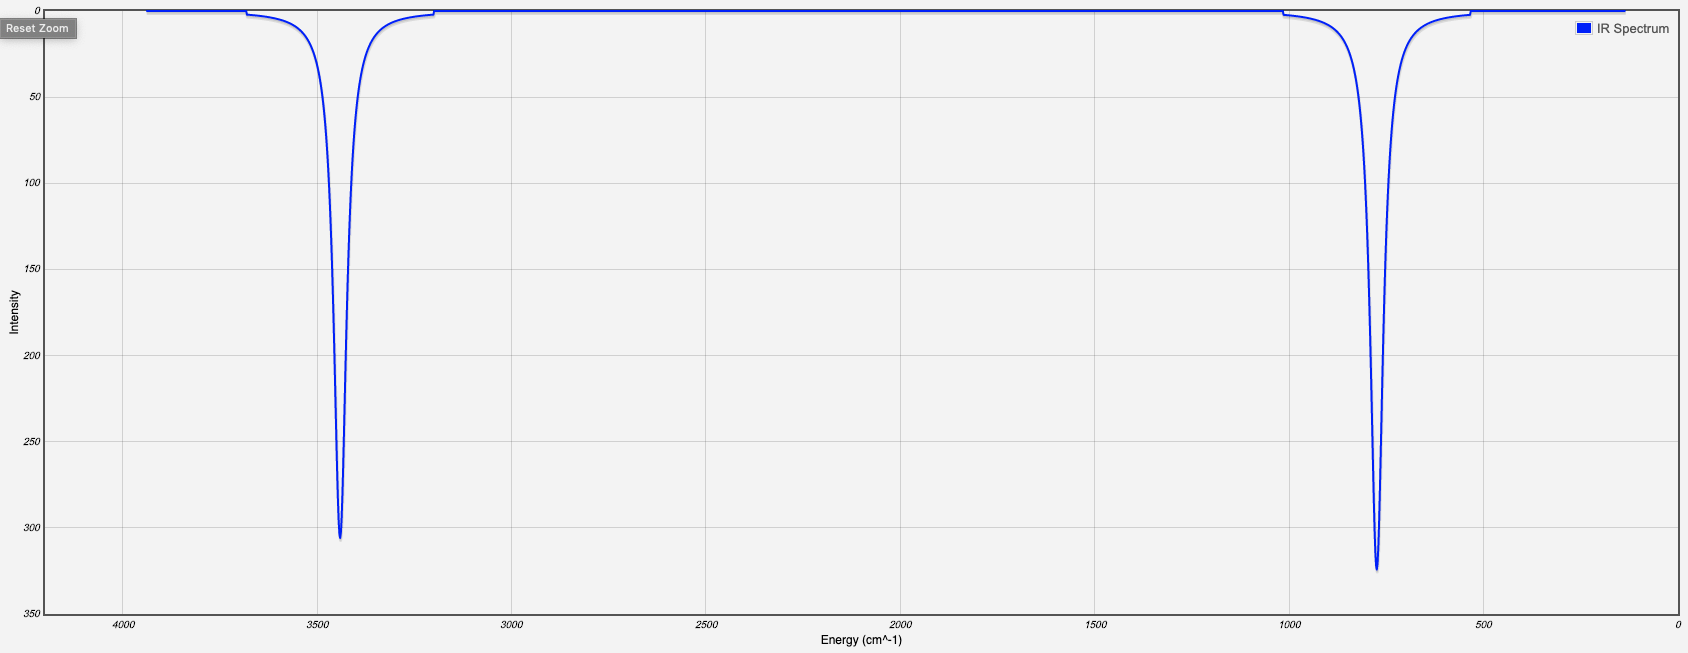
### C2H4
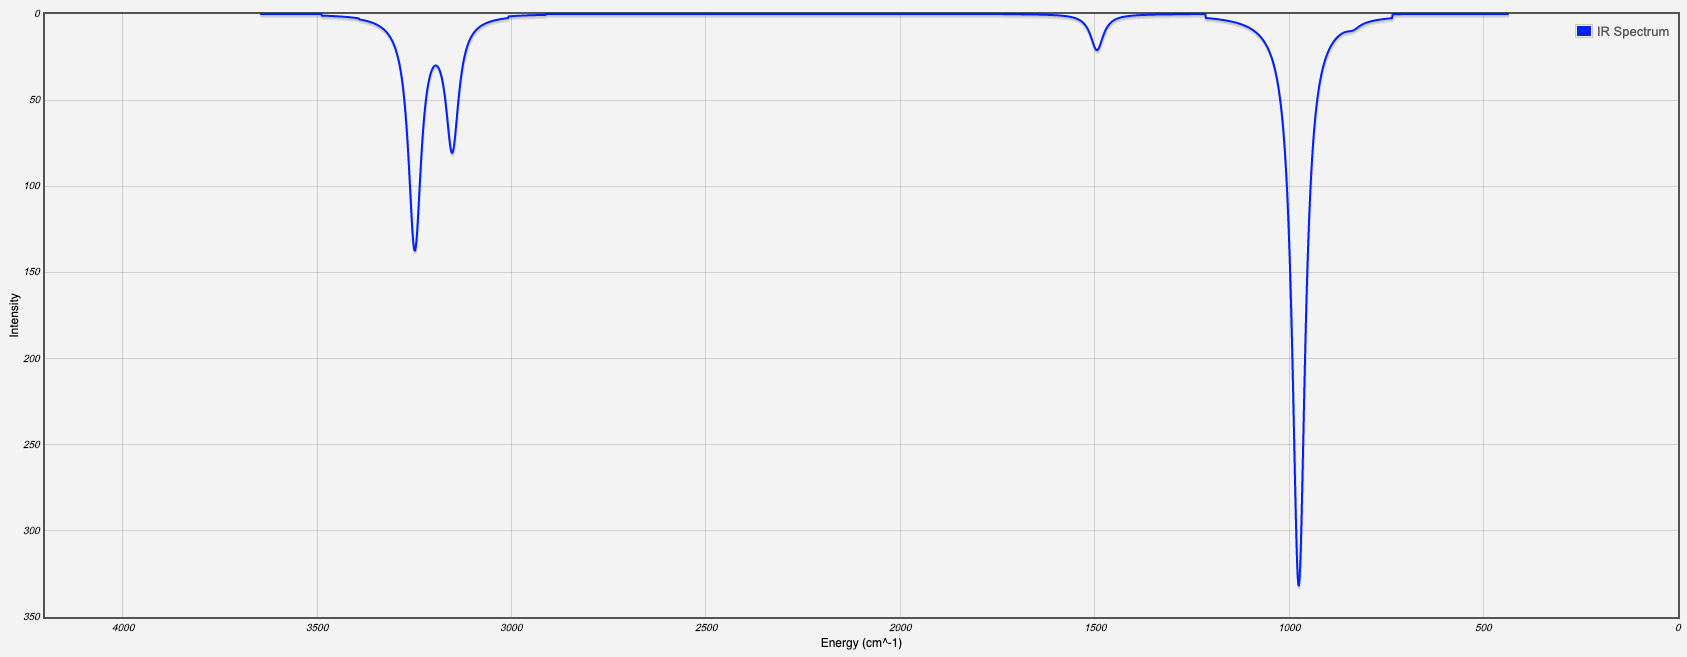
### C2H6
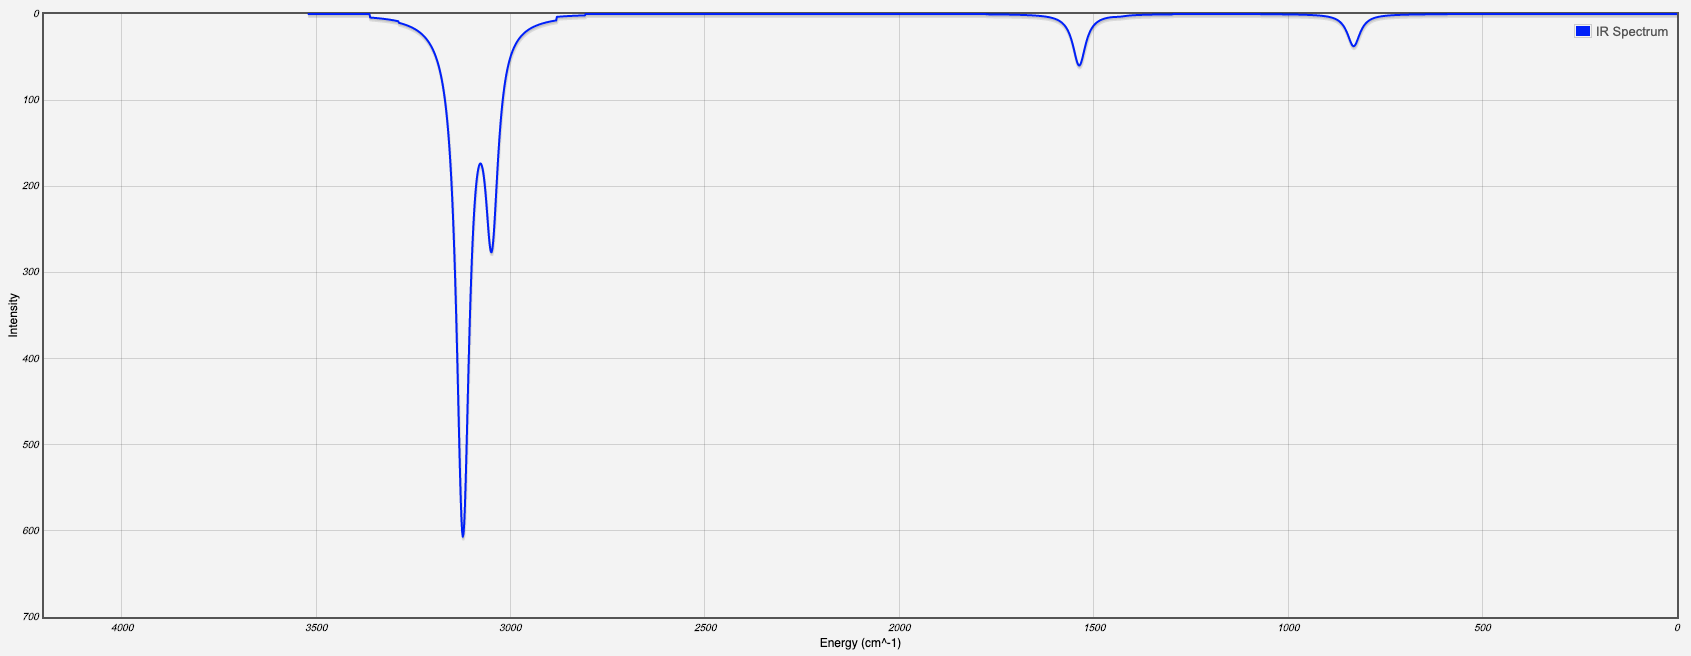

### 13. Compute the structure and energy of H$_2$.   Use it to compare the energies to hydrogenate acetylene to ethylene and ethylene to ethane.  Which is easier to hydrogenate?  Can you see why selective hydrogenation of acetylene to ethylene is difficult to do?

Use your 'optimized' structures above to calculate their 'Molecular Energy' in Webmo.

In [19]:
E_H2 = -1.16646206791 # Ha
E_C2H2 = -77.3256461775 # Ha, acetylene
E_C2H4 = -78.5874580928  # Ha, ethylene
E_C2H6 = -79.8304174812 # Ha, ethane

E_rxn1 = (E_C2H4 - E_C2H2 - E_H2)*2625.50 # kJ/mol, H2 + C2H2 -> C2H4
E_rxn2 = (E_C2H6 - E_C2H4 - E_H2)*2625.50 # kJ/mol, H2 + C2H4 -> C2H6
print("E_rnx1 = %f kJ/mol, E_rnx2 = %f kJ/mol"%(E_rxn1, E_rxn2))

E_rnx1 = -250.341024 kJ/mol, E_rnx2 = -200.843715 kJ/mol


Exothermic to add the first H2 to acetylene (to make ethylene) and to add second H2 to make ethane.  A selective hydrogenation catalyst must help the first to happen and not the second.